# CONCRETE STRENGTH PREDICTION WITH MACHINE LEARNING

ANGELOS TOUTOUNTZAKIS

Concrete is the most important material in the profession of a civil engineer.
The compressive strength of concrete is a highly non-linear function of its age and composition. For this reason, calculating the strength of concrete is a demanding and quite difficult process, with a higher percentage of incorrect measurement using conventional methods. The following machine learning model was created to facilitate the calculation of concrete strength using real data taken from the Kaggle website.

## Import dependances

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\Users\atout\OneDrive\Έγγραφα\MACHINE LEARNING\εγγραφα εργαστηριου μηχανικη μαθηση\data\Concrete_Data_Yeh.csv') #change the file path! 

In [3]:
data.shape

(1030, 9)

In [4]:
data.info

<bound method DataFrame.info of       cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0      540.0    0.0     0.0  162.0               2.5           1040.0   
1      540.0    0.0     0.0  162.0               2.5           1055.0   
2      332.5  142.5     0.0  228.0               0.0            932.0   
3      332.5  142.5     0.0  228.0               0.0            932.0   
4      198.6  132.4     0.0  192.0               0.0            978.4   
...      ...    ...     ...    ...               ...              ...   
1025   276.4  116.0    90.3  179.6               8.9            870.1   
1026   322.2    0.0   115.6  196.0              10.4            817.9   
1027   148.5  139.4   108.6  192.7               6.1            892.4   
1028   159.1  186.7     0.0  175.6              11.3            989.6   
1029   260.9  100.5    78.3  200.6               8.6            864.5   

      fineaggregate  age  csMPa  
0             676.0   28  79.99  
1             676.0   2

In [5]:
data.head(20)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


This is a particulary small dataset, that consist of 1030 rows and 9 columns. More specifically, these 9 characteristics are the following:

* cement (kg in a m3 mixture)

* slag (kg in a m3 mixture)

* flyash (kg in a m3 mixture)

* water (kg in a m3 mixture)

* superplasticizer (kg in a m3 mixture)

* coarse aggregate (kg in a m3 mixture)

* fine aggregate (kg in a m3 mixture)

* age (in days)

* csMPa (compressive strength in MPa)

We then split our data into X input data and y output data.

In [6]:
X = data[['cement', 'slag', 'flyash','water','superplasticizer' ,'coarseaggregate' ,'fineaggregate','age']]
y=data['csMPa']

The input data X has 1030 lines-samples and 8 columns-features while the output data y has 1030 lines and a single column. This way we can check if we have the same set of samples for X and for y. Additionally it makes sense that the data set y consists of one column, which is "csMPa" (the requested output).

The chart below plots the csMPa column values against their frequency of occurrence in the data set. We notice that most of the values for this characteristic of the dataset lie between 20 and 40 MPa. As a result, our model will be able to predict concrete strength (csMPa) more accurately within the specific value range.

C:\Users\atout\AppData\Local\Temp\ipykernel_25372\4055791008.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['csMPa'], bins=30)


<AxesSubplot: xlabel='csMPa', ylabel='Density'>

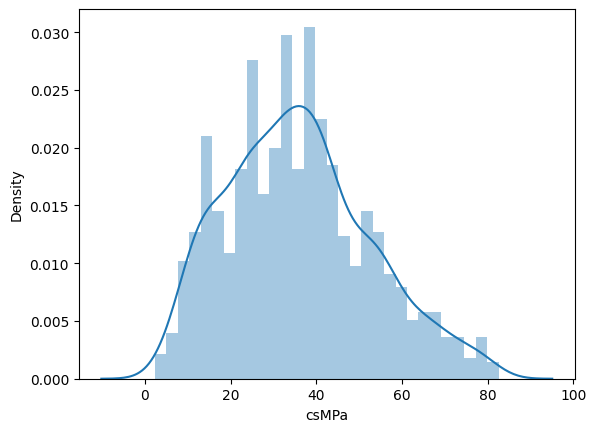

In [7]:
sns.distplot(data['csMPa'], bins=30)

It is important to graph all the data in the dataset as we can gather useful information about the features we have!

array([[<AxesSubplot: title={'center': 'cement'}>,
        <AxesSubplot: title={'center': 'slag'}>,
        <AxesSubplot: title={'center': 'flyash'}>],
       [<AxesSubplot: title={'center': 'water'}>,
        <AxesSubplot: title={'center': 'superplasticizer'}>,
        <AxesSubplot: title={'center': 'coarseaggregate'}>],
       [<AxesSubplot: title={'center': 'fineaggregate'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'csMPa'}>]], dtype=object)

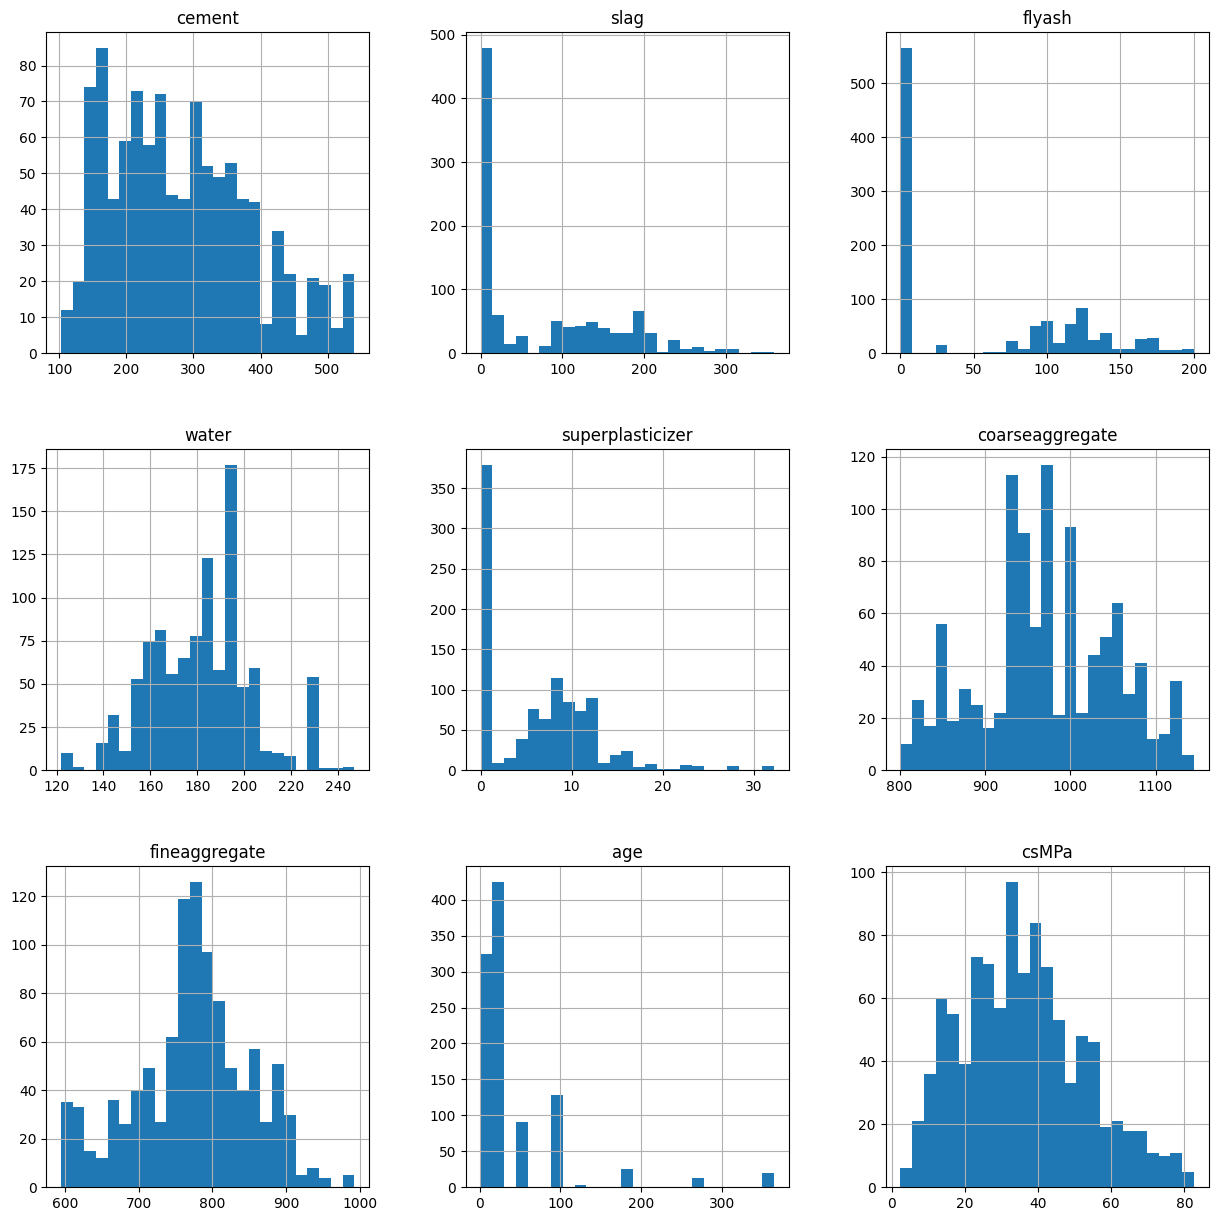

In [8]:
data.hist(bins=25, figsize=(15, 15))

For example, from the graphs above I notice that the "age" of the concrete (age) is limited to very specific values with most samples being between values of 3, 7, 28 and 56 days. This fact limits our data and causes an additional uncertainty in our result in case the new sample we will test in our final model has a higher value than the above or a new value in the "age" column. In more detail the unique values of "age" in the specific data set are shown below.

In [9]:
data.age.value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

The frequency table of the dataset is a graphical way of displaying the connection that each feature has with the other. For example we observe that a higher correlation exists between the characteristics "superplasticizer" and "flyash" (0.38) as well as between "age" and "water" (0.28).

<AxesSubplot: >

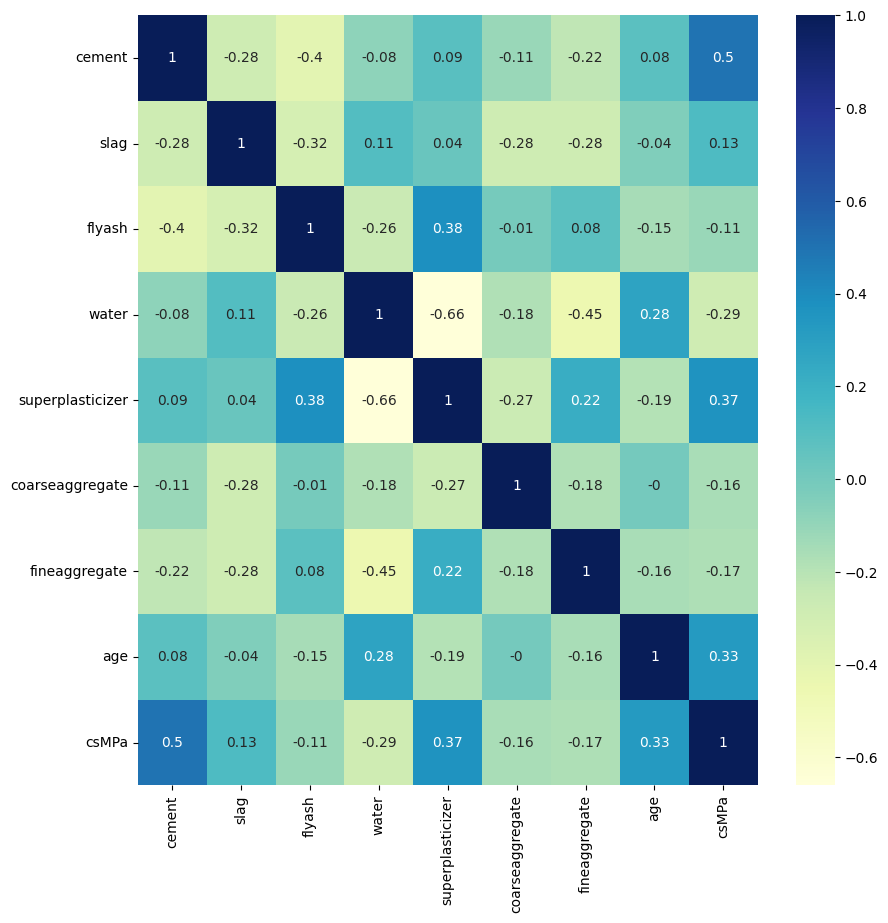

In [10]:
correlation_matrix = data.corr().round(2)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True,cmap='YlGnBu')

We then split our data into training data (X_train and y_train) and test data (X_test and y_test). After "testing" different numbers on test_size and random_state the combination that gave me the highest success rate was when I used 25% of the dataset for testing (test_size=0.25) and when I started random sampling with random_state=18. As a result I used 75% of the data to train the model.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=18)
print("The dimension of X_train is:",X_train.shape)
print("The dimension of X_test is:",X_test.shape)
print("The dimension of y_train is:",y_train.shape)
print("The dimension of y_test is:",y_test.shape)

The dimension of X_train is: (772, 8)
The dimension of X_test is: (258, 8)
The dimension of y_train is: (772,)
The dimension of y_test is: (258,)


# MODEL CONSTRUCTION

## LINEAR REGRESSION (1st method)

In these sample model I used 3 different implementation methods, as you will see below. First I tried a linear regression whose result was very general with the "accuracy" of my model reaching 65%.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
linregressor = LinearRegression()

In [14]:
linregressor.fit(X_train, y_train)

LinearRegression()

In [15]:
print(linregressor.intercept_)
print(linregressor.coef_)
print(data.csMPa)

-23.23319991795026
[ 0.11678517  0.10210474  0.08572306 -0.14519131  0.32945043  0.01729668
  0.02116078  0.11018789]
0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: csMPa, Length: 1030, dtype: float64


In [16]:
print((list(zip(X, linregressor.coef_))))

[('cement', 0.11678516618963423), ('slag', 0.10210473603803247), ('flyash', 0.08572306142676601), ('water', -0.1451913138912658), ('superplasticizer', 0.32945043427855925), ('coarseaggregate', 0.017296679355768608), ('fineaggregate', 0.021160776969046877), ('age', 0.1101878946150539)]


Then we calculate the effectiveness of the model (R2 score), the mean squared error (Root Mean Squared Error) and the mean absolute error (Mean Absolute Error) with the method of linear regression as shown below.

In [17]:
from sklearn import metrics
y_pred_test = linregressor.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_test)
# root mean square error του μοντέλου
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
# r-squared score του μοντέλου
r2 = r2_score(y_test, y_pred_test)
linregressor.score(X_test, y_test)

print("RESULTS OF THE MODEL FOR THE TEST DATA")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',linregressor.score(X_test, y_test))

RESULTS OF THE MODEL FOR THE TEST DATA
--------------------------------------
Mean Absolute Error=  7.883705737475514
Root Mean Squared Error =  9.80959067807062
R2 score =  0.6594016791021301


The next step is to create the graphical representation of the linear regression, which as we can see is not accurate as the line of estimated value (dashed) does not sufficiently cover the field of true values (blue dots).

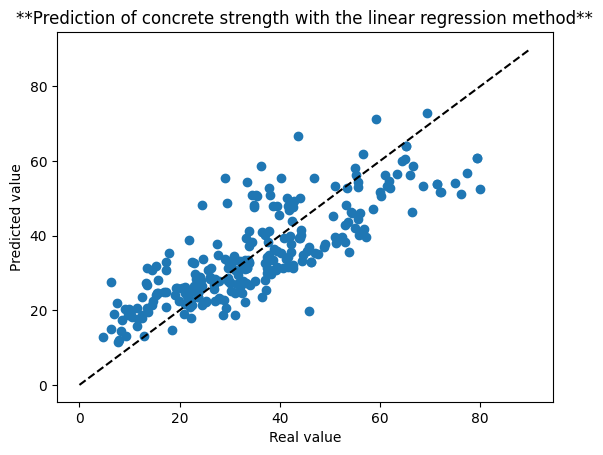

In [18]:
plt.scatter(y_test, y_pred_test)

plt.plot([0, 90], [0, 90], '--k')

plt.title('**Prediction of concrete strength with the linear regression method**')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.show()

Utilizing the Cross-validation method, we calculate the average performance of the model using the linear regression method by dividing our data into 10 subsets (cv=10) and calculating the effectiveness of each one.

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
performance = cross_val_score(linregressor, X, y, cv = 10)
print("performance with Cross-validation:",performance)

performance with Cross-validation: [-1.23793275  0.52781604  0.35320313  0.32773718  0.31284515  0.2211098
  0.48980302  0.65236133  0.57860456  0.55652546]


We calculate the average of the above 10 values and thus obtain the average performance with cross-validation for linear regression.

In [21]:
print("Average performance of linear regression with cross-validation:",performance.mean())

Average performance of linear regression with cross-validation: 0.27820729160873764


## REGRESSION WITH K NEAREST NEIGHBORS (2nd method)

Then I tried to regress the K nearest neighbors method with the results this time being more encouraging and the performance of the model reaching 75%

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

To find the most ideal value of n_neighbors I used a for loop structure and calculated the R2 score for each integer n_neighbors value from 1 to 29. Then I added these values to an empty list I created for this purpose as shown below .

In [23]:
list = []
for i in range(1,30):
    knnregressor= KNeighborsRegressor(n_neighbors=i)
    knnregressor.fit(X_train,y_train)
    y_pred = knnregressor.predict(X_test)
    from sklearn.metrics import r2_score
    x = r2_score(y_test, y_pred)
    k = int(i)
    list.append(x)
    print("For k nearest neighbors=",k,"the R2 score is",x)

For k nearest neighbors= 1 the R2 score is 0.7590190797676594
For k nearest neighbors= 2 the R2 score is 0.7498414028966873
For k nearest neighbors= 3 the R2 score is 0.7326288526450038
For k nearest neighbors= 4 the R2 score is 0.7426560203335728
For k nearest neighbors= 5 the R2 score is 0.7536300675591631
For k nearest neighbors= 6 the R2 score is 0.7410869524270638
For k nearest neighbors= 7 the R2 score is 0.7310197402999934
For k nearest neighbors= 8 the R2 score is 0.7259778991009896
For k nearest neighbors= 9 the R2 score is 0.7147518648492507
For k nearest neighbors= 10 the R2 score is 0.7032559248244494
For k nearest neighbors= 11 the R2 score is 0.6918347497071109
For k nearest neighbors= 12 the R2 score is 0.6878827714005828
For k nearest neighbors= 13 the R2 score is 0.6799701016233068
For k nearest neighbors= 14 the R2 score is 0.6701141982249171
For k nearest neighbors= 15 the R2 score is 0.6636560589974089
For k nearest neighbors= 16 the R2 score is 0.6575433987700381
F

In [24]:
u=list.index(max(list))
print("The biggest R2 of the list is",max(list),"when the number of k nearest neighbors are",u+1)

The biggest R2 of the list is 0.7590190797676594 when the number of k nearest neighbors are 1


For n_neighbors=1 I will have the best value of R2. However, I choose to put more neighbors so that my result is more objective and allows generalization. For this reason I choose the second largest value of R2 which is for n_neighbors=5, as shown in the list above.

In [25]:
Knnregressor = KNeighborsRegressor(n_neighbors=5)
Knnregressor.fit(X_train, y_train)

KNeighborsRegressor()

And we recalculate the effectiveness of the model (R2 score), the root mean squared error and the mean absolute error with the K nearest neighbors regression method.

In [26]:
from sklearn import metrics
y_pred_test = Knnregressor.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_test)
# root mean square error 
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
# r-squared score 
r2 = r2_score(y_test, y_pred_test)
Knnregressor.score(X_test, y_test)

print("RESULTS OF THE MODEL FOR THE TEST DATA")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',Knnregressor.score(X_test, y_test))

RESULTS OF THE MODEL FOR THE TEST DATA
--------------------------------------
Mean Absolute Error=  6.326697674418605
Root Mean Squared Error =  8.343023886211249
R2 score =  0.7536300675591631


The K-nearest-neighbor regression plot, as we can see, is more accurate than the previous one as the estimated value line (dashed) covers more effectively the range of true values (blue dots).

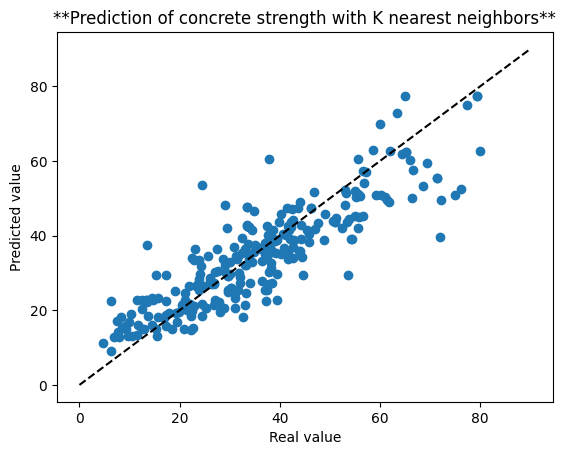

In [27]:
plt.scatter(y_test, y_pred_test)

plt.plot([0, 90], [0, 90], '--k')

plt.title('**Prediction of concrete strength with K nearest neighbors**')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.show()

Cross-validation calculates the average performance of the model using K-nearest-neighbor regression by dividing our data into 10 subsets (cv=10) and calculating the efficiency of each one.

In [28]:
Performance_2 = cross_val_score(Knnregressor, X, y, cv = 10)
print("Performance with Cross-validation:",Performance_2)
print("Average performance of K nearest neighbors with cross-validation:",Performance_2.mean())

Performance with Cross-validation: [-0.67337343 -0.43696107  0.53939424  0.08090485  0.11060058  0.50720046
  0.2604819   0.58276252  0.73590492  0.74998655]
Average performance of K nearest neighbors with cross-validation: 0.24569015221013682


## REGRESSION WITH RANDOM FOREST (3rd method)

The third and last method I used was the Random Forest regression whose result was the most ideal. The efficiency of the model remains at 75%, however I preferred this particular method because it gives me the smallest mean square and mean absolute error than the previous two.

First I added all the necessary tools I will need from the "sklearn" library.

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

In [30]:
rfc = RandomForestRegressor(n_estimators=500,max_features = 4)

In [31]:
rfc.fit(X_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=500)

In [32]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [33]:
rfc.feature_importances_

array([0.25485527, 0.06993581, 0.04023595, 0.1291649 , 0.07712233,
       0.04177323, 0.0541854 , 0.33272711])

The importance of each feature is as follows:

-cement (25%)

-slag (6%)

-flyash (4%)

-water (12%)

-superplasticizer (7%)

-coreaggregate (4%)

-fine aggregate (5%)

-age (33%)

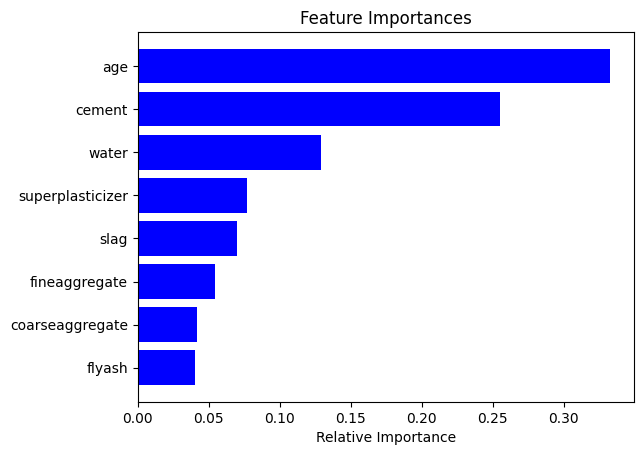

In [34]:
features = ['cement', 'slag', 'flyash','water','superplasticizer' ,'coarseaggregate' ,'fineaggregate','age']
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [35]:
y_pred_test = rfc.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_test)
# root mean square error 
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
# r-squared score 
r2 = r2_score(y_test, y_pred_test)
Knnregressor.score(X_test, y_test)

print("RESULTS OF THE MODEL FOR THE TEST DATA")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',Knnregressor.score(X_test, y_test))

RESULTS OF THE MODEL FOR THE TEST DATA
--------------------------------------
Mean Absolute Error=  3.3428526290143954
Root Mean Squared Error =  4.8356041025353
R2 score =  0.7536300675591631


From the results I notice that the R2 score value remains the same as that of the K nearest neighbors. Nevertheless, the mean squared error and the mean absolute error were significantly reduced and for this reason I choose the regression method with Random Forest as the optimal solution of the specific problem.

The Random Forest regression plot, as we can see, is even more accurate than the previous two as the line of estimated value (dashed) covers almost the entire field of true values (blue dots).

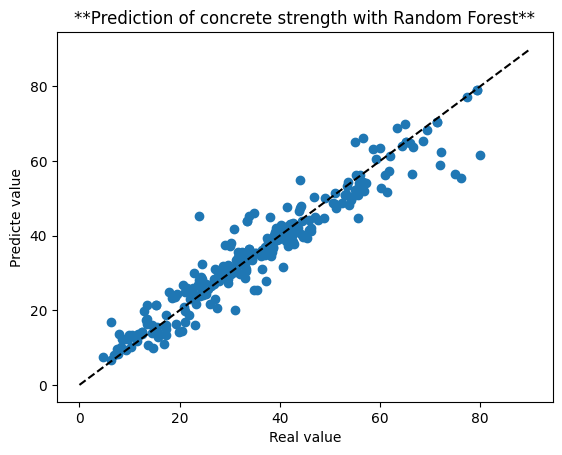

In [36]:
plt.scatter(y_test, y_pred_test)

plt.plot([0, 90], [0, 90], '--k')

plt.title('**Prediction of concrete strength with Random Forest**')
plt.xlabel('Real value')
plt.ylabel('Predicte value')
plt.show()

In [37]:
Performance_3 = cross_val_score(rfc, X, y, cv = 10)
print("Performance with Cross-validation:",Performance_3)
print("Average performance of rfc with cross-validation:",Performance_3.mean())

Performance with Cross-validation: [0.9162846  0.88054255 0.80793068 0.9173938  0.98112852 0.84622388
 0.94387695 0.87159937 0.91730105 0.97573843]
Average performance of rfc with cross-validation: 0.9058019831641907


# TESTING THE MODEL

To test the model we will need the input and output data (X_test and y_test) that we had reserved for testing the model.

In [38]:
X_test

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
25,380.0,0.0,0.0,228.0,0.0,932.0,670.0,270
163,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,91
583,210.7,316.1,0.0,185.7,0.0,977.0,689.3,28
931,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28
700,133.0,200.0,0.0,192.0,0.0,927.4,839.2,3
...,...,...,...,...,...,...,...,...
256,212.5,0.0,100.4,159.3,8.7,1007.8,903.6,28
20,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180
566,255.5,170.3,0.0,185.7,0.0,1026.6,724.3,28
606,236.0,0.0,0.0,194.0,0.0,968.0,885.0,14


We then display the y_test output data which represents the actual "csMPa" values (concrete strength in MPa) for each sample of X_test.

In [39]:
y_test

25     53.30
163    66.60
583    37.81
931    15.34
700     6.88
       ...  
256    31.64
20     41.84
566    32.05
606    12.84
296    31.12
Name: csMPa, Length: 258, dtype: float64

Finally we introduce a new sample with input data from X_test and using Random Forest regression, the model will be able to predict the concrete strength in MPa.

In [40]:
neoDeigma = np.array([[168.9,42.2,124.3,158.3,10.8,1080.8,796.2,28]])#the new sample is sample 296 from X_test
prediction = rfc.predict(neoDeigma)
print("The predicted value of the concrete's strength is",prediction,"MPa")

The predicted value of the concrete's strength is [31.524] MPa


c:\Users\atout\anaconda3\envs\gpu_env2\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


As we can see the estimated strength of concrete for sample 296 of X_test is about 31.52 MPa (probably you are seeing a slightly different number due to the randomness contained in the Random Forest method). According to the y_test data for sample 296 the actual concrete strength is 31.12 MPa.

In [41]:
neoDeigma = np.array([[427.5,47.5,0.0,228.0,0.0,932.0,594.0,180]])#the new sample is sample 20 from X_test
prediction = rfc.predict(neoDeigma)
print("The predicted value of the concrete's strength is",prediction,"MPa")

The predicted value of the concrete's strength is [41.90462] MPa


c:\Users\atout\anaconda3\envs\gpu_env2\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Accordingly we can see that the estimated concrete strength for sample 20 of X_test is approximately 41.90 MPa (probably you are seeing a slightly different number due to the randomness contained in the Random Forest method). According to the y_test data for sample 20 the actual concrete strength is 41.84 MPa.

## KEEP IN MIND

If our model have to predict a value of csMPa that is not between the values of 20 to 40 MPa then the deviation of the actual and estimated value will grow as we observed in the frequency diagram of values of csMPa.

C:\Users\atout\AppData\Local\Temp\ipykernel_25372\4055791008.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['csMPa'], bins=30)


<AxesSubplot: xlabel='csMPa', ylabel='Density'>

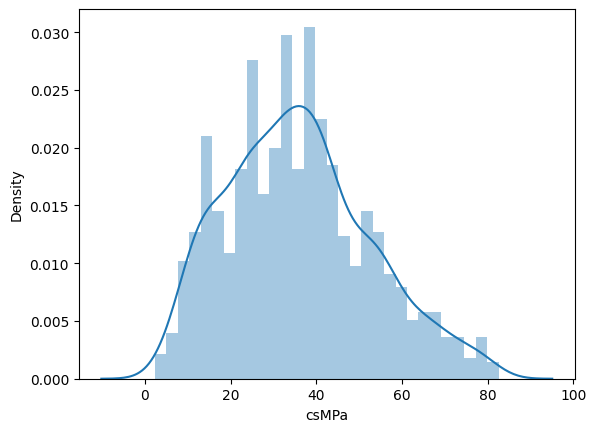

In [42]:
sns.distplot(data['csMPa'], bins=30)

For example if we use sample 700 of X_test the estimated strength of the concrete will be:

In [43]:
neoDeigma = np.array([[133.0,200.0,0.0,192.0,0.0,927.4,839.2,3]])#the new sample is sample 700 from X_test
prediction = rfc.predict(neoDeigma)
print("The predicted value of the concrete's strength is",prediction,"MPa")

c:\Users\atout\anaconda3\envs\gpu_env2\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


The predicted value of the concrete's strength is [7.98422] MPa


As expected the estimated concrete value (7.98 MPa) has a greater deviation from the actual value (6.88 MPa) for sample 700, compared to the two previous test samples whose values ranged approximately between 20 and 40 MPa. This phenomenon is observed because our dataset consists of more samples in the specific range of values of csMPa resulting in our prediction between 20-40 MPa being more accurate.

# CONCLUSIONS

In conclusion, the optimal method (from the three metioned) to solve this particular problem is the regression with Random Forest. Last but not least the model for estimating the strength of concrete could be more accurate by adding to the data set additional samples that more adequately cover a larger range of "csMPa" values.